In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stat

In [2]:
data=pd.read_csv('Advertising.csv')

# 1. Explain the dataset

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [8]:
data1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


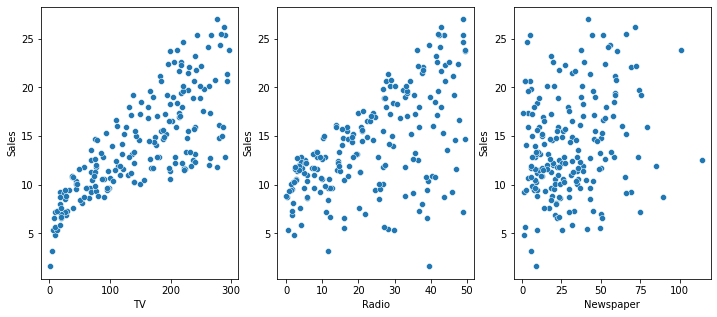

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['TV'],y=data['Sales'])

plt.subplot(1,3,2)
sns.scatterplot(x=data['Radio'],y=data['Sales'])

plt.subplot(1,3,3)
sns.scatterplot(x=data['Newspaper'],y=data['Sales'])

plt.show()

Even if we spent more amount on advertising in newspaper it does not improve sales like TV and Radio.

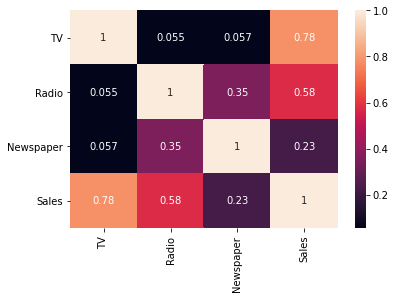

In [10]:
sns.heatmap(data1.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

There is high positive correlation between advertising in TV and Sales and low positive correlation between advertising in Newspaper and Sales

# 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [11]:
data1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The maximum amount spent for advertising in TV is 296.4, advertising in Radio is 114 and for Newspaper is 114.

When we compare Sales with advertising amount in three different platforms, the Sales are comparatively low.

The maximum and minimum for Sales are 27 and 1.6 respectively.

When we look into percentiles the highest is for TV and lowest is for Radio.

The mean and median of TV is highly deviated from means and medians of newspaper and radio.

# 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

Let,

Null hypothesis (H0) :- The amount spent for TV, Radio, and Newspaper are equal.

Alternative hypothesis (Ha) :- The amount spent for TV, Radio, and Newspaper are not equal.

set significance level, alpha as 0.05

if p value <0.05, we could reject the Null hypothesis and accept the Alternative hypothesis.

if p value >0.05, we could accept the null hypothesis and reject the Alternative hypothesis.

In [13]:
from scipy.stats import f_oneway

F, p = f_oneway(data['TV'],data['Radio'],data['Newspaper'])
print('F-statistic :',F)
print('p-value :',p)

F-statistic : 358.8514595342597
p-value : 4.552931539744962e-103


In [14]:
if p<0.05:
    print('We reject the Null hypothesis, that means the amount spent for TV, Radio, and Newspaper are not equal.')
else:
    print('We accept the Null hypothesis, that means the amount spent for TV, Radio, and Newspaper are equal.')

We reject the Null hypothesis, that means the amount spent for TV, Radio, and Newspaper are not equal.
